# Import Libraries

In [1]:
import numpy as np
import cv2
import  imutils
import matplotlib.pyplot as plt 
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

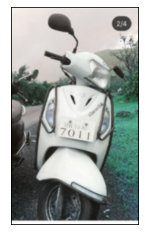

In [2]:
# Read the image file
image = cv2.imread('bike_img.jpeg')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

# Display the original image
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [3]:
# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow("1 - Grayscale Conversion", gray)

# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
# cv2.imshow("2 - Bilateral Filter", gray)

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
# cv2.imshow("4 - Canny Edges", edged)

In [4]:
# Find contours based on Edges
contours = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
NumberPlateCnt = None #we currently have no Number plate contour

In [5]:
# loop over contours to find the best possible approximate contour of number plate
count = 0
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:  # Select the contour with 4 corners
        NumberPlateCnt = approx #This is our approx Number Plate Contour
        break

In [6]:
# Drawing the selected contour on the original image
cv2.drawContours(image, NumberPlateCnt, -1, (0,255,0), 3)
# cv2.imshow("Final Image With Number Plate Detected", image)
cv2.waitKey(0) #Wait for user input before closing the images displayed

-1

In [7]:
#Read the number plate
text = pytesseract.image_to_string(image, config='--psm 11')
print("Detected Number plate is:",text)

Detected Number plate is: 4

ay)

y

\ 7

)

v):

70}

=

SS

\\

